# <a href="https://thetahat.ru/courses/ph-ds-2025-spr">Phystech@DataScience </a>

In [1]:
# Bot check

# HW_ID: phds_sem8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.



In [2]:
import numpy as np
import random
import scipy.stats as sps
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.8)

In [3]:
# зафиксируем сид для воспроизводимости генерации
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Проверка гипотез

В данной задаче вам предлагается изучить основы работы с критериями при проверке различных гипотез.

## Построение критерия

Будем рассматривать выборку из нормального распределения $\mathcal{N}(\theta, 1)$. Необходимо провести проверку гипотезы равенства параметра распределения нулю с двусторонней альтернативой $\mathsf{H}_0\colon \theta = 0$ vs. $\mathsf{H}_1\colon \theta \neq 0$.

Для начала попробуем построить критерий "из здравого смысла". На предыдущих лекциях вы учились строить доверительные интервалы для выборочного среднего, которое является асимптотически нормально оценкой матожидания случайной величины.

В случае нормального распределения и известной $\sigma = 1$ на лекции получали ДИ с уровнем доверия $\alpha_{int}$: $$\left(\overline{X} - \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)$$

Здесь использован тот факт, что среднее $n$ случайных величин, полученных из $\mathcal{N}(\theta, 1)$, имеет нормальное распределение $\mathcal{N}(\theta, \frac{1}{n})$.

Зная этот факт, мы можем попробовать использовать следующий критерий для проверки гипотезы $\mathsf{H}_0\colon \theta = 0$ vs. $\mathsf{H}_1\colon \theta \neq 0$:
$$S=\left\{ 0 \notin \left(\overline{X} - \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)\right\}$$

Таким образом, при получении выборки $X$ проверка $\mathsf{H}_0$ выглядит следующим образом:

$$X \in S  \Leftrightarrow	\text{0 НЕ лежит в построенном доверительном интервале} \Leftrightarrow \mathsf{H}_0 \text{ отвергается}$$
$$X \notin S  \Leftrightarrow	\text{0 лежит в построенном доверительном интервале} \Leftrightarrow \mathsf{H}_0 \text{ НЕ отвергается}$$

Однако, для корректного использования данного критерия необходимо верно подобрать значение $\alpha_{int}$.

**Вопрос**: Какую величину мы ограничиваем при построении критерия? Какое $\alpha_{int}$ нам нужно взять, чтобы проверить гипотезу на уровне значимости $\alpha=0.05$?

*Подсказка*: $\alpha_{int}$ определяет вероятность лежать в доверительном интервале

**Ответ**: Мы ограничиваем вероятность распределения при выборке, которая отвергает нулевую гипотезу. $\alpha_{int} = 1 - \alpha = 0.95$

## Ошибки при проверке гипотез

Рассмотрим следующую выборку из нормального распределения $\mathcal{N}(0, 1)$. Проверьте, выполняется ли для нее придуманный нами критерий. 

In [6]:
sample = [-0.82899501, -0.56018104,  0.74729361,  0.61037027, -0.02090159,
          0.11732738,  1.2776649 , -0.59157139,  0.54709738, -0.20219265,
          -0.2176812 ,  1.09877685,  0.82541635,  0.81350964,  1.30547881,
          0.02100384,  0.68195297, -0.31026676,  0.32416635, -0.13014305,
          0.09699596,  0.59515703, -0.81822068,  2.09238728, -1.00601738,
          -1.21418861,  1.15811087,  0.79166269,  0.62411982,  0.62834551]

In [8]:
n = 30 
alpha = 0.05
z = sps.norm.ppf(1 - alpha/2)

theta_hat = np.mean(sample)
theta_hat - z  / np.sqrt(n), theta_hat + z / np.sqrt(n)

(-0.07595622374343147, 0.6397214337434314)

Отвергается ли гипотеза $\mathsf{H}_0$ для данной выборки?

**Ответ**: $H_0$ не отвергается

Почему это произошло и как называется такая ошибка?



**Ответ**: Это не произошло. Ошибки нет

Теперь рассмотрим выборку, сгенерированную из нормального распределения $\mathcal{N}(0.5, 1)$. Так как $\theta \neq 0$ наш критерий не должен выполняться. Проверьте, дейстивительно ли это так.

In [9]:
sample = [ 0.12452627,  0.95075805,  0.77166076, -1.45365582, -0.49410224,
          1.66660296, -0.93194618, -0.42985368,  0.27260541,  1.46066343,
          -1.31198164,  0.20520295,  3.19213611,  0.55957285,  0.50613194, 
          0.05689217, -0.8558408 ,  0.12584525,  0.73918692, -0.05739113,
          0.76803961,  0.32823556,  0.05156772, -0.0566054 ,  0.60217298,
          2.21606323, -1.02851902, -0.56797192, -0.64263642,  0.95315636]

In [10]:
n = 30 

theta_hat = np.mean(sample)
theta_hat - z  / np.sqrt(n), theta_hat + z  / np.sqrt(n)

(-0.1004882860767648, 0.615189371410098)

Отвергается ли гипотеза $\mathsf{H}_0$ для данной выборки?

**Ответ**: Не отвергается

Почему так произошло и как называетcя такая ошибка?


**Ответ**: Размер выборки слишком мал. Это ошибка второго рода

## Мощность критерия

Теперь попробуем аналитически вывести мощность получившегося критерия. Для этого вспомним, что мощность является вероятностью выполнения критерия (т.е. $X \in S$) в случае заведомой верности альтернативной гипотезы $\mathsf{H}_1\colon \theta \neq 0$.

Для выборки из нормального распределения $\mathcal{N}(\theta, 1)$ посчитаем вероятность того, что $0$ не попадает в доверительный интервал $\left(\overline{X} - \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)$.

$$P\left( 0 \notin \left(\overline{X} - \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)\right) = P\left( \overline{X} \notin \left(- \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)\right) = 1 - P\left( \overline{X} \in \left(- \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)\right)$$

Как уже упоминалось в задании выше, $\overline{X}$ имеет распределение $\mathcal{N}(\theta, \frac{1}{n})$. Зная этот факт, мы можем посчитать вероятность попасть в данный интервал с помощью функции распределения $F$ нормального распределения $\mathcal{N}(\theta, \frac{1}{n})$. Введем также следующие обозначения: $\alpha = 1-\alpha_{int}$, $c=\frac{z_{1-\frac{\alpha}{2}}}{\sqrt{n}}$.

$$P\left( \overline{X} \leq - c\right) = F(-c)$$
$$P\left( \overline{X} \leq c\right) = F(c)$$
$$P\left( \overline{X} \in \left(- c, c\right)\right) = F(c)-F(-c)$$

И, следовательно, мощность нашего критерия принимает следующий вид: $$\beta = 1 - F(с) +F(-с)$$

где $F$ - функция распределения $\overline{X}$.

Постройте график полученной мощности критерия для $\theta \in [-1, 1]$ при условии, что мы работаем с выборками из 30 элементов и уровнем значимости $0.05$.

In [15]:
# Функция для вычисления мощности построенного критерия
def get_power(theta, n, c):
    """
    param theta: значение параметра
    param n: количество элементов выборки
    param с: критическое значение

    return beta - мощность критерия
    """
    c = np.abs(c)
    
    # Для подсчета значений функции распределения из beta вам понадобятся функции cdf и sf для распределений из scipy.stats
    # ! Не забывайте, что параметр scale нормального распределения sps.norm принимает корень из дисперсии !
    beta = 1 - sps.norm.cdf(c / np.sqrt(n), loc=grid, scale=1/np.sqrt(n)) + sps.norm.cdf(- c / np.sqrt(n), loc=grid, scale=1/np.sqrt(n))
    
    return beta

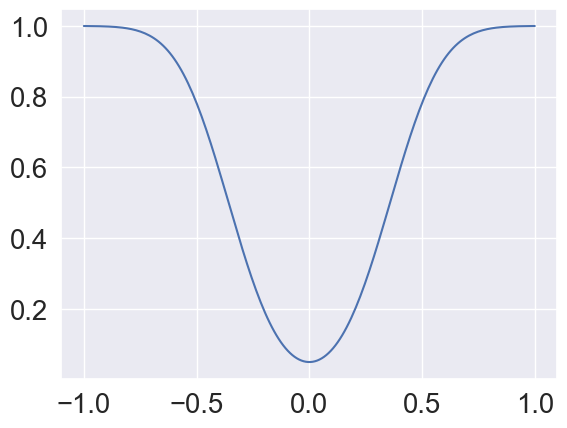

In [16]:
n = 30
alpha = 0.05

# Зададим сетку параметров theta
grid = np.linspace(-1, 1, 200)

c = sps.norm.ppf(1 - 0.05 / 2)
powers = get_power(grid, n, c)
plt.plot(grid, powers)

Какой вывод можно сделать из графика? Как изменяется значение мощности при удалении от точки $\theta = 0$?

**Ответ**: Мощность растёт при удалении от $\theta = 0$. Ошибка второго рода уменьшается

## P-value

На лекции вы узнали про p-value &mdash; это минимальный уровень значимости, при котором гипотеза еще может быть отвергнута:

$$pvalue = min\left\{ \alpha| X \in S\right\}$$

В нашем случае можно формула принимает следующий вид:
$$pvalue = min\left\{ \alpha\:\bigg|\:0 \notin \left(\overline{X} - \frac{z_{1-\frac{\alpha}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{1-\frac{\alpha}{2}}}{\sqrt{n}}\right)\right\}$$

Для имеющейся выборки постройте график факта отвержения нулевой гипотезы нашим критерием в зависимости от уровня значимости $\alpha \in (0, 1)$.

In [17]:
# Функция определяющая факт отвержения гипотезы
# Выводит 0, если гипотеза была отвергнута, 1 - в противном случае
def criterion(sample, alpha=0.05):
    t = np.mean(sample)
    n = len(sample)
    z = sps.norm.ppf(1 - alpha/2)
    return 1 - int(t - z  / np.sqrt(n) < 0 < t + z / np.sqrt(n))

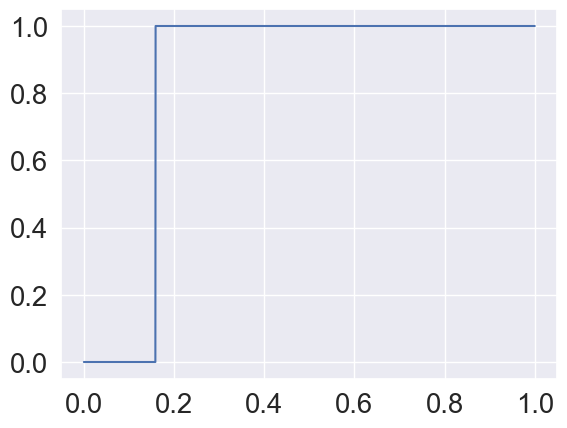

In [18]:
sample = [ 0.12452627,  0.95075805,  0.77166076, -1.45365582, -0.49410224,
          1.66660296, -0.93194618, -0.42985368,  0.27260541,  1.46066343,
          -1.31198164,  0.20520295,  3.19213611,  0.55957285,  0.50613194,
          0.05689217, -0.8558408 ,  0.12584525,  0.73918692, -0.05739113,
          0.76803961,  0.32823556,  0.05156772, -0.0566054 ,  0.60217298,
          2.21606323, -1.02851902, -0.56797192, -0.64263642,  0.95315636]

# Задаем сетку параметров alpha
alphas = np.linspace(0, 1, 2000)

# Создаем массив, в который будет записывать результат проверки гипотезы в зависимости от alpha
is_rejected = []
for alpha in alphas:
  is_rejected.append(criterion(sample, alpha))

plt.plot(alphas, is_rejected)

Выведите полученное значение p-value.

In [21]:
alphas[is_rejected.index(1)]

0.15907953976988493

# Критерий Вальда

Вы провели эксперимент и получили данные из экспоненциального распределения. 

In [24]:
sample = [0.11731702, 0.75253036, 0.32918642, 0.22823564, 0.04240622,
          0.04239907, 0.01495969, 0.50280772, 0.22977054, 0.30781252,
          0.00519983, 0.87588937, 0.44660739, 0.05967191, 0.05016975,
          0.05065286, 0.09068843, 0.18598196, 0.14138427, 0.08605575,
          0.23659272, 0.03755863, 0.08637888, 0.1140693 , 0.15223367,
          0.384484  , 0.05568397, 0.18050729, 0.22437618, 0.01189096]

Вы хотите проверить, является ли это распределение с параметром $\lambda=2$. Используя Критерий Вальда, сделайте вывод по данному предположению.

## Двусторонняя альтернатива
$X_1, ... X_n$ - выборка из распределения $Exp(\theta)$.  
Проверьте гипотезу $\mathsf{H}_0\colon \theta = 2$ vs. $\mathsf{H}_1\colon \theta \neq 2$

Из лекции вы узнали про критерий Вальда.
Для случая двусторонней альтернативы $\mathsf{H}_1\colon \theta \neq \theta_0$ критерий имел следующий вид:
$$\large{S = \left\{ \left|\sqrt{n} \frac{\hat{\theta} - \theta_0}{\hat{\sigma}} \right| > z_{1 - \frac{\alpha}{2}} \right\}}$$

где $\hat{\theta}$ &mdash; асимптотически нормальная оценка $\theta$ с асимптотической дисперсией $\sigma^2(\theta)$, 
$\hat{\sigma}$ &mdash; состоятельная оценка $\sigma(\theta)$.  

Эквивалентный асимптотичсекий доверительный интервал для параметра $\theta$ уровня доверия $1-\alpha$
$$C = \left( \hat{\theta} - \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}, \hat{\theta} + \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}\right)$$

На первой лекции вы получали, что $\frac{1}{\overline{X}}$ &mdash; АНО для параметра $\theta$ c асимптотической дисперсией $\theta^2$

**Выпишите состоятельную оценку дисперсии и статистику критерия Вальда**


**Ответ:**  $1/\overline{X}^2$  - состоятельная. Статистика $W = \sqrt n(1 - 2 \overline{X})$

Первым шагом необходимо выставить уровень значимости, поставим $\alpha = 0.05$

In [26]:
alpha = 0.05
theta = 2 # тета из основной гипотезы
n = len(sample)

Посчитаем квантиль (критическое значение)

In [29]:
z = sps.norm.ppf(1 - alpha / 2)

Посчитайте статистику, которую будете сравнивать с критическим значением. Выведите значение полученной статистики.

In [30]:
statistic = np.sqrt(n)*(1 - 2 * np.mean(sample))
statistic

3.2704505437191247

Сравним модуль статистики с критическим значением

In [31]:
np.absolute(statistic) > z

True

**Какой вывод можно сделать?**

**Вывод:** $H_0$ отвергается

Посчитайте доверительный интервал

In [32]:
1 / np.mean(sample) * (1 - sps.norm.ppf(1 - alpha / 2) / np.sqrt(n)), 1 / np.mean(sample) * (1 + sps.norm.ppf(1 - alpha / 2) / np.sqrt(n))

(3.187693843343649, 6.740324187101982)

**Какой вывод можно сделать?**

**Вывод:** $H_0$ отвергается

На лекции вы узнали про p-value &mdash; это вероятность получить при справедливости $H_0$ такое значение статистики $t = T(x)$ или еще более экстремальное, то есть в случае двустороннего критерия
$$p(x) = \mathsf{P}_0(T(X) \geq|t|) + \mathsf{P}_0(T(X) \leq -|t|)$$
Посчитайте p-value. Для этого можно использовать функции из библиотеки `scipy.stats`.

In [33]:
sps.norm.sf(statistic) + sps.norm.cdf(-statistic)

0.0010737631605120244

Оформите подсчет статистики и  p-value в виде одной функции.

In [ ]:
def wald_test_two_sided(sample, theta, estimation_theta, estimation_sigma):
    """
    param sample: реализация выборки
    param theta: истинное значение параметра
    param estimation_theta: оценка параметра
    param estimation_sigma: оценка асимптотической дисперсии оценки estimation_sigma

    return statistic
    return p_value
    return conf_int - доверительный интервал
    """
    <...>

Теперь посмотрим на выборку меньших размеров

In [ ]:
sample_cut = [0.11731702, 0.75253036, 0.32918642, 0.22823564, 0.04240622,
        0.04239907, 0.01495969, 0.50280772, 0.22977054, 0.30781252]

Выведите статистику, p-value и доверительный интервал. Какой вывод можно сделать из полученных значений?

In [ ]:
<...>

**Вывод:** <...>